# **Machine Learning Project**
### Student:
- LE Thi Hoa - 12310380
- TRAN Hai Linh - 12310487

### Supervisor:
- Assoc.Prof.Cazabet Rémy

## **Dataset: Bank Term Deposit Subscription**
- The data is related with direct marketing campaigns of a Portuguese banking.

### About this data: 
- This dataset, titled Direct Marketing Campaigns for Bank Term Deposits, is a collection of data related to the direct marketing campaigns conducted by a Portuguese banking institution. These campaigns primarily involved phone calls with customers, and the objective was to determine whether or not a customer would subscribe to a term deposit offered by the bank.

### Source of dataset: 
https://huggingface.co/datasets/Andyrasika/banking-marketing

### Import requires libraries

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load dataset

In [3]:
data_df = pd.read_csv("../Data/train.csv")
data_df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
data_df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


## --------------------------------- Basic Information -------------------------------

In [5]:
print(f"Shape of the dataset:  \n\t{data_df.shape[0]} rows \n\t{data_df.shape[1]} columns")

Shape of the dataset:  
	45211 rows 
	17 columns


#### Columns Name

In [6]:
print("The columns of the dataset: \n")
columns_df = pd.DataFrame(data_df.columns, columns=['Column Names'])
columns_df

The columns of the dataset: 



,Column Names
0,age
1,job
2,marital
3,education
4,default
5,balance
6,housing
7,loan
8,contact
9,day


#### Data type

In [7]:
# Display data type of each column
data_types = data_df.dtypes
print("Data types of each column: \n")
print(data_types)

Data types of each column: 

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object


#### Genaral information

In [8]:
print("Display basic information about the dataset: \n")
print(data_df.info())

Display basic information about the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None


#### Display summary statistics of numeric columns

In [9]:
print("Statistical summary description: \n")
data_df.describe() 

Statistical summary description: 



,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


- The data exhibits significant variability in certain variables such as Balance and the number of Contacts in the Campaign.
- Information regarding the duration of calls appears to be diverse, ranging from very short to very long.
- Data pertaining to the number of days since the last call (Pdays) is predominantly around the average, but there are instances with a large number of days.
- For several variables, there is a substantial difference between the minimum and maximum values, indicating diversity in the data.

#### The number of unique values in each column.

In [12]:
nunique_df = pd.DataFrame(data_df.select_dtypes(include='object').nunique(), columns=["Count"])
nunique_df_transposed = nunique_df.transpose()
nunique_df_transposed

,job,marital,education,default,housing,loan,contact,month,poutcome,y
Count,12,3,4,2,2,2,3,12,4,2


#### Y value

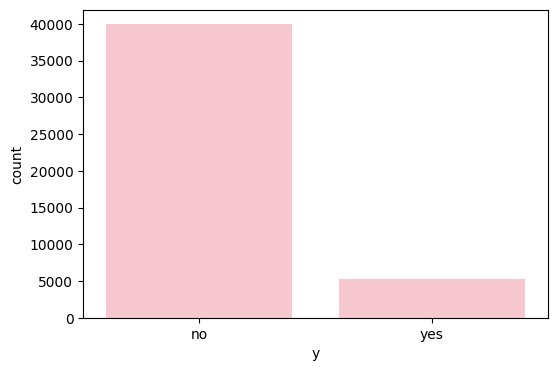

In [13]:
# Set the size of the plot
plt.figure(figsize=(6, 4))
sns.countplot(data=data_df, x='y',color='pink')
plt.show()

## --------------------------------- Data Cleaning -------------------------------------

### Duplicate values

In [14]:
# Check for duplicates in the dataset
duplicates = data_df.duplicated()

# Calculate the percentage of duplicate rows
duplicate_percentage = (duplicates.sum() / len(data_df)) * 100

# Information about duplicates
print(f"\nTotal number of duplicate rows: {duplicates.sum()}")
print(f"Percentage of duplicate: {duplicate_percentage:.2f}%")


Total number of duplicate rows: 0
Percentage of duplicate: 0.00%


There are no duplicate rows

### Missing Values

In [15]:
# Check for missing values in the DataFrame
missing_values = data_df.isnull().sum()

# Calculate the percentage of missing values
missing_percentage = (missing_values / len(data_df)) * 100

# Create a DataFrame containing information
missing_info = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})

# Display the count of missing values for each column
print("The count of missing values for each column: \n")
missing_info

The count of missing values for each column: 



,Missing Values,Percentage
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0
balance,0,0.0
housing,0,0.0
loan,0,0.0
contact,0,0.0
day,0,0.0


There are no missing values!

### Handle Outliers

**Outliers Checking**

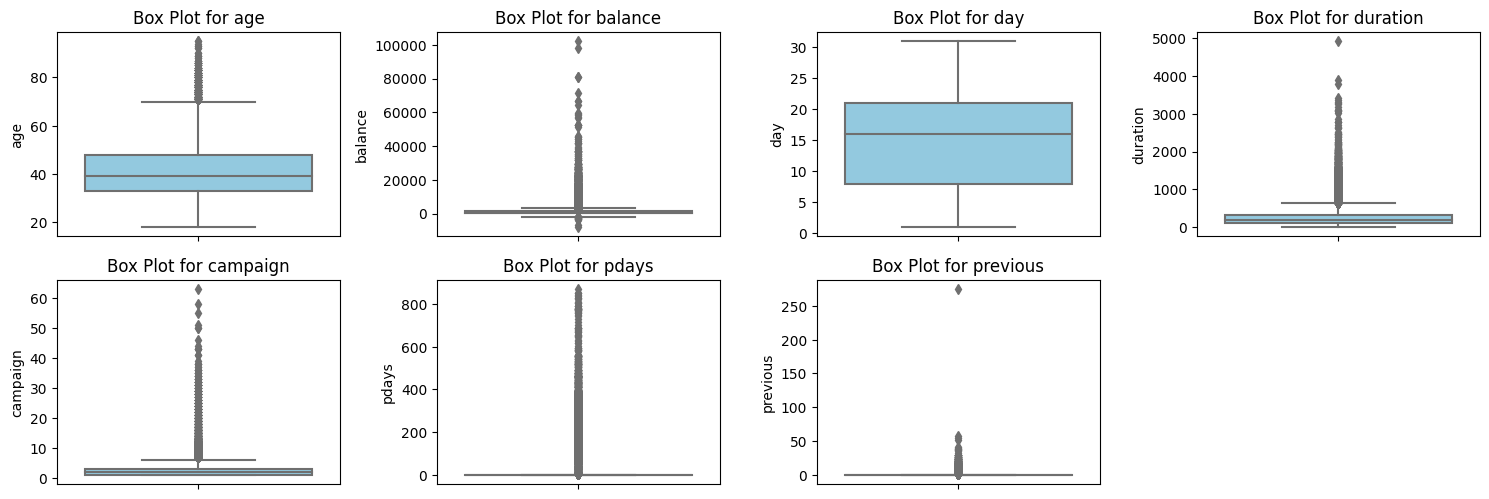

In [17]:
# Select only numeric columns
numeric_columns = data_df.select_dtypes(include=['int64', 'float64']).columns

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Iterate through each numeric column in data_df
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data_df[column], color='skyblue')
    plt.title(f'Box Plot for {column}')
    plt.savefig("outliers_checking.png")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### **Conclusion**
**Columns with Outliers:**
- Columns 'age,' 'duration,' and 'campaign' contain a significant number of outliers, especially 'duration' exhibiting a pronounced outlier distribution. Considering how to handle these outliers is crucial to ensure the model is not unduly influenced by these observations.

**Column "balance":**
- The 'balance' column exhibits a substantial number of outliers. However, in the context of banking and financial data, these values might be normal if there are customers with exceptionally high account balances. Preserving this information could be vital to retain crucial insights about customers.

#### To remove outliers using the Interquartile Range (IQR) method

In [18]:
# Calculate IQR for selected columns
Q1 = data_df[['age', 'balance', 'duration', 'campaign']].quantile(0.25)
Q3 = data_df[['age', 'balance', 'duration', 'campaign']].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = ((data_df[['age', 'balance', 'duration', 'campaign']] < (Q1 - 1.5 * IQR)) | (data_df[['age', 'balance', 'duration', 'campaign']] > (Q3 + 1.5 * IQR))).any(axis=1)

# Remove outliers from the dataframe
data_df_no_outliers = data_df[~outliers]


**After handling outliers, the dataset is as follows:**

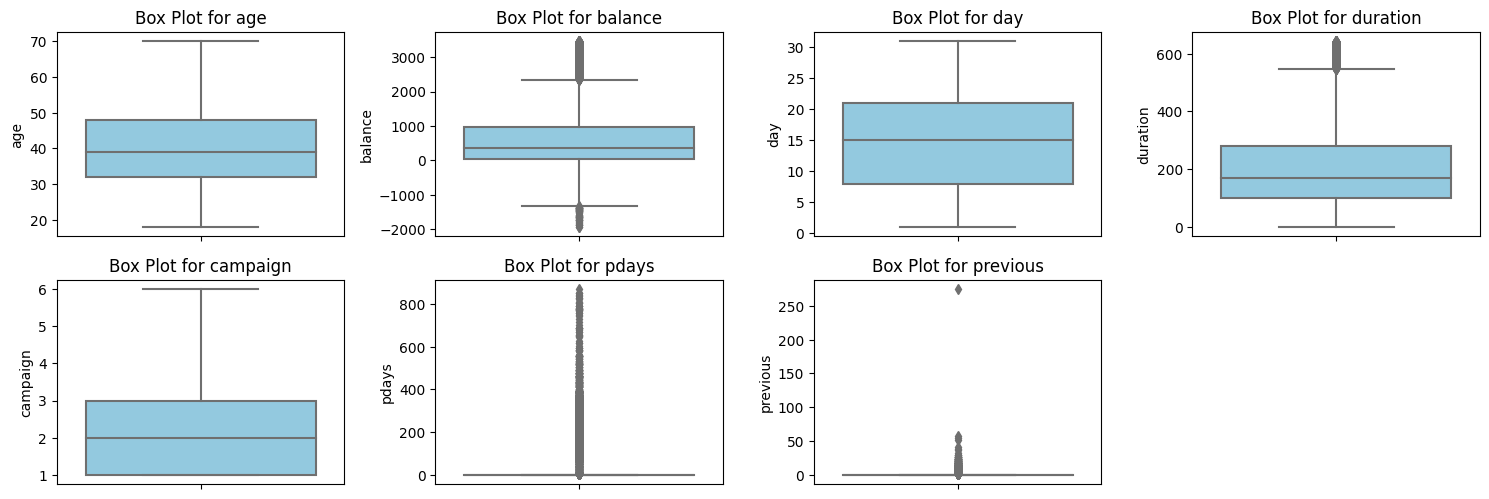

In [19]:
# Select only numeric columns
numeric_columns = data_df_no_outliers.select_dtypes(include=['int64', 'float64']).columns

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Iterate through each numeric column in data_df
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=data_df_no_outliers[column], color='skyblue')
    plt.title(f'Box Plot for {column}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

#### duration: last contact duration, in seconds (numeric) must be values >0 -> Remove rows with value duration <=0

In [20]:
# Remove rows with 'duration' <= 0
data_df_no_outliers = data_df_no_outliers[data_df_no_outliers['duration'] > 0]

In [21]:
print(f"Shape of the dataset after cleaning:  \n\t{data_df_no_outliers.shape[0]} rows \n\t{data_df_no_outliers.shape[1]} columns")

Shape of the dataset after cleaning:  
	34717 rows 
	17 columns


## ---------------------------------- Explore Data Analysis -----------------------------------

#### Converting "y" values from categorical labels into numerical format

In [22]:
# Map 'yes' to 1 and 'no' to 0
data_df_no_outliers['y'] = data_df_no_outliers['y'].map({'yes': 1, 'no': 0})

#### Converting pdays to a binary variable
- Converting 'pdays' to a binary variable can help focus on examining the impact of previous contacts on the likelihood of customer agreement. If 'pdays' is -1, it may signify that the customer has not been contacted, while other values may represent customers who have been contacted before.

In [23]:
# Convert 'pdays' to a binary variable
data_df_no_outliers['pdays_bin'] = data_df_no_outliers['pdays'].apply(lambda x: "No" if x == -1 else "Yes")
data_df_no_outliers.drop('pdays', axis=1, inplace=True)

### Distribution 
#### Count occurrences of each unique value in each column

In [24]:
for column in data_df_no_outliers.columns:
    value_counts = data_df_no_outliers[column].value_counts()
    print(f"\n-------------------- {column} ----------------------")
    print(value_counts)


-------------------- age ----------------------
age
32    1617
31    1599
33    1567
34    1501
35    1473
36    1415
30    1392
37    1345
39    1131
38    1116
40    1052
41     996
29     989
42     971
45     939
46     919
43     886
44     877
47     853
28     832
48     760
49     757
52     728
27     719
51     712
50     708
53     665
26     644
55     611
54     607
57     602
56     597
59     560
58     522
25     431
60     420
24     253
23     159
22     113
61     111
21      74
62      60
63      58
64      55
66      47
65      47
20      46
70      43
67      39
19      32
69      31
68      24
18      12
Name: count, dtype: int64

-------------------- job ----------------------
job
blue-collar      7705
management       7002
technician       5890
admin.           4187
services         3332
retired          1398
self-employed    1180
entrepreneur     1146
unemployed        984
housemaid         933
student           762
unknown           198
Name: count, dtype: i

#### Let's see distribution of columns

<Figure size 1500x800 with 0 Axes>

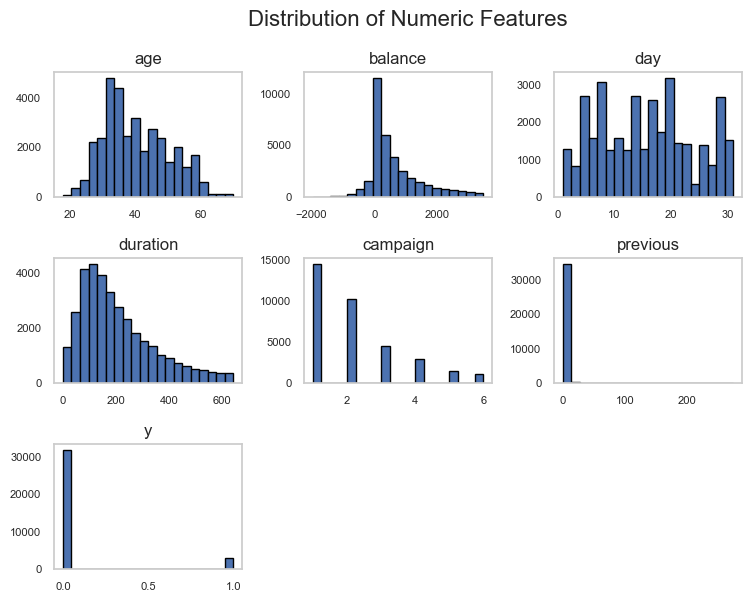

In [26]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Plot the distribution of numeric features
numeric_columns = data_df_no_outliers.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 8))
data_df_no_outliers[numeric_columns].hist(bins=20, edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout(rect=(0, 0, 1.2, 1.2))
plt.suptitle('Distribution of Numeric Features', x=0.65, y=1.25, fontsize=16)
# Save the plot as an image file 
plt.savefig('numeric_features_distribution.png')
plt.show()

#### **Insights**
- **Age**: Age distribution is mainly concentrated between 32 and 48 years old, with a large number of customers in this group.
- **Balance**: The balance distribution shows counts for different balance values. There is a wide range of balance values, with a notable number of zero balances.
- **Day**: Call volume increases over the weekend (Friday to Monday), with a peak on the 20th.
- **Duration**: The duration distribution provides counts for different durations of calls.
- **Campaign**: Most customers are part of one or two campaigns.
- **Previous**: Most customers have not been previously contacted.
- **Y (Target Variable)**: The target variable 'y' indicates whether customers subscribed to a term deposit. There are fewer instances of 'yes' compared to 'no' in the dataset. When building the classification algorithm we will have to apply an oversampling method to avoid the model predicting based on size.

### Display the degree of correlation between pairs of numeric variables

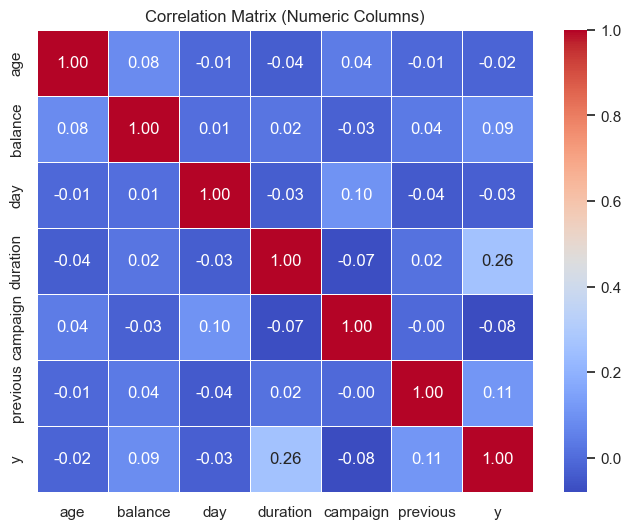

In [27]:
# Select only numeric columns
numeric_data = data_df_no_outliers.select_dtypes(include='number')

# Create a correlation matrix
correlation_matrix = numeric_data.corr()

# Set the size of the plot
plt.figure(figsize=(8, 6))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Correlation Matrix (Numeric Columns)')
plt.show()

#### **Insights**
- The **'duration'** feature stands out with a notable positive correlation, indicating its influence on the target variable.

### Caterogy Features

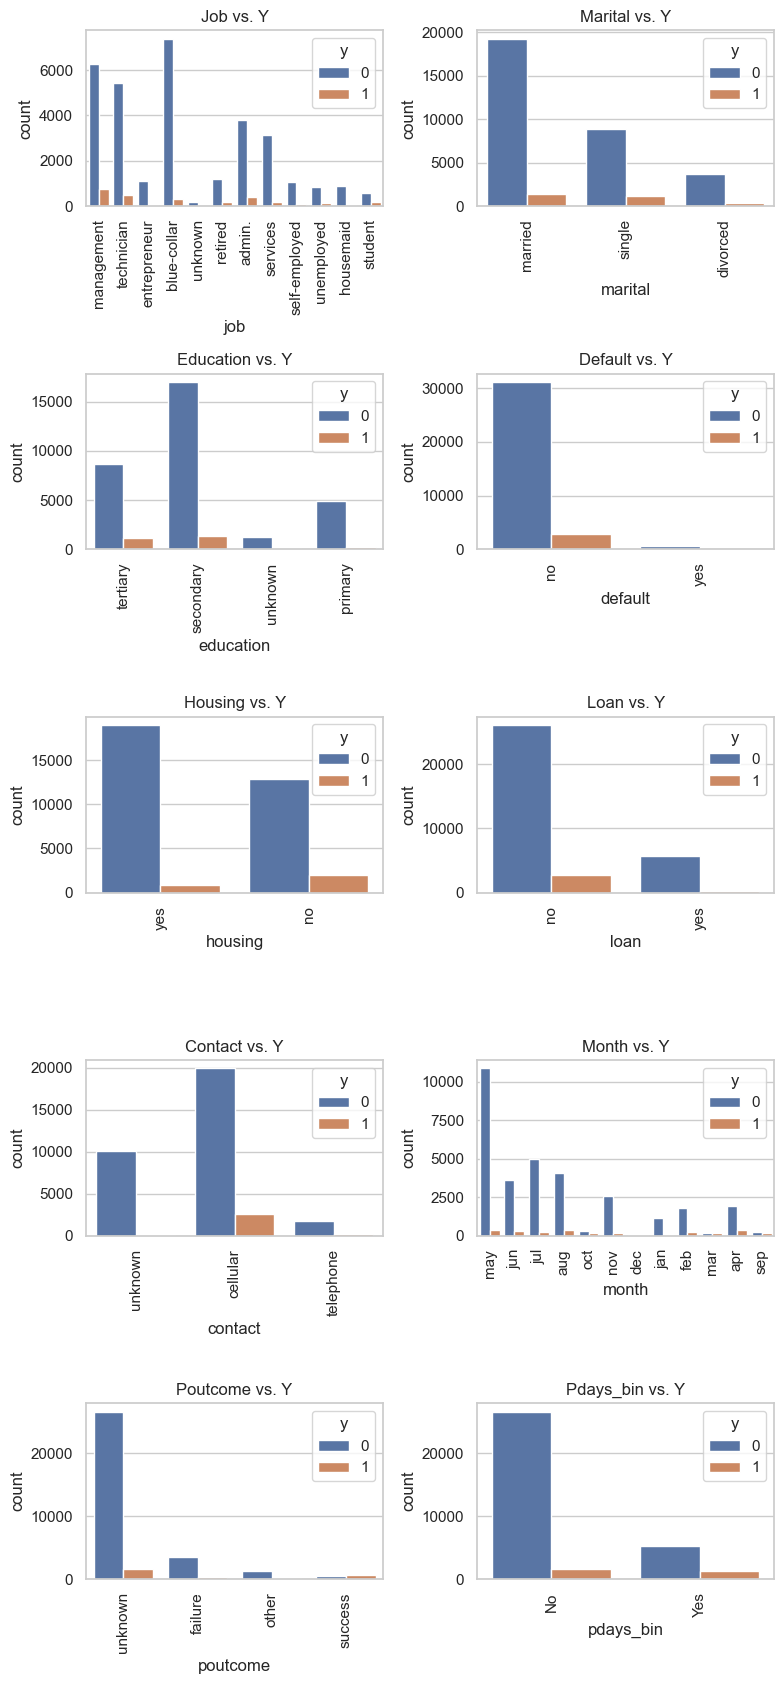

In [29]:
# Set the size of the plot
plt.figure(figsize=(8, 17))

# List of categorical variables to plot
category_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'pdays_bin']

# Plot each categorical variable
for i, variable in enumerate(category_variables, 1):
    plt.subplot(5, 2, i)
    sns.countplot(x=variable, hue='y', data=data_df_no_outliers)
    plt.title(f'{variable.capitalize()} vs. Y')
    plt.xticks(rotation=90)

# Adjust the layout
plt.tight_layout()
plt.savefig("category_features_impact_y.png")
plt.show()

#### Insights:
- **Job vs. Y:**
   - Management, technician, and admin. have a higher registration count compared to non-registration.
   - Blue-collar, services, and manual jobs have a lower registration rate.
- **Marital vs. Y:**
   - Married individuals have a higher registration count compared to singles and divorced.
- **Education vs. Y:**
   - The group with tertiary education has a higher registration rate compared to other groups.
- **Default vs. Y:**
   - No default tends to have a higher registration count.
- **Housing vs. Y:**
   - Customers without a housing loan have a higher registration rate compared to those with a housing loan.
- **Loan vs. Y:**
   - Customers without a personal loan tend to register more.
- **Contact vs. Y:**
   - Contact through mobile (cellular) has a higher registration rate compared to other methods.
- **Month vs. Y:**
   - There is variation in registration counts across months. May has the highest registration count.
- **Poutcome vs. Y:**
   - The "success" outcome of the previous marketing campaign has a higher registration rate.
- **Pdays_bin**:
    - The data indicates that previous contact in a campaign (pdays_bin = 1) is associated with a higher likelihood of subscription (y = 1). Clients who were not previously contacted (pdays_bin = 0) are more likely to not subscribe (y = 0).
- These insights provide an overall view of how category variables impact the target variable Y and can be useful in building a predictive model.

#### Relationship between Duration, Job, and Y Value

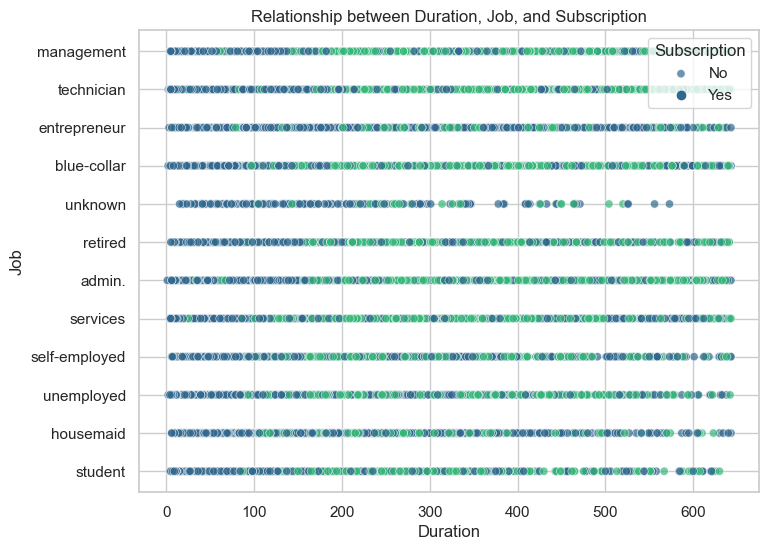

In [59]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration', y='job', hue='y', data=data_df_no_outliers, palette='viridis', alpha=0.7, edgecolor='w', linewidth=0.5)

# Set plot labels and title
plt.xlabel('Duration')
plt.ylabel('Job')
plt.title('Relationship between Duration, Job, and Subscription')

# Show legend
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])

# Show the plot
plt.savefig('Relationship_between_Duration_Job_and_Subscription.png')
plt.show()

**Insight:**

- There is a significant variation in the duration of calls among different occupational groups when considering subscriptions and non-subscriptions.
- Occupational groups such as 'blue-collar,' 'entrepreneur,' and 'services' tend to have longer call durations when there is a subscription, whereas the 'student' group has the shortest duration.
- The 'unknown' group experiences a substantial decrease in call duration when there is a subscription, possibly due to a small sample size.

#### Relationship between Duration, Education, and Y Value¶

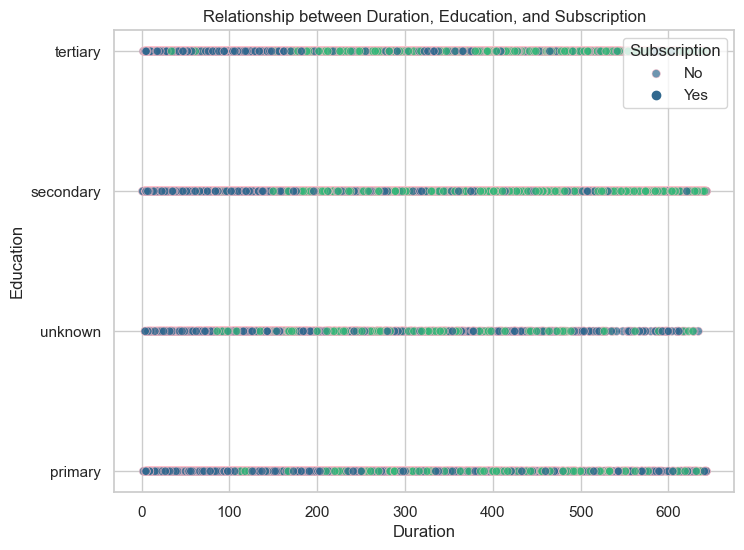

In [63]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='duration', y='education', hue='y', data=data_df_no_outliers, palette='viridis', alpha=0.7, edgecolor='pink', linewidth=0.5)

# Set plot labels and title
plt.xlabel('Duration')
plt.ylabel('Education')
plt.title('Relationship between Duration, Education, and Subscription')

# Show legend
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])

# Show the plot
plt.savefig('Relationship_between_Duration_Education_and_Subscription.png')
plt.show()


**Insight**
- In general, there seems to be a trend that individuals with higher education levels may have longer call durations when subscribing.

#### Relationship between Duration, Marital, and Y Value¶

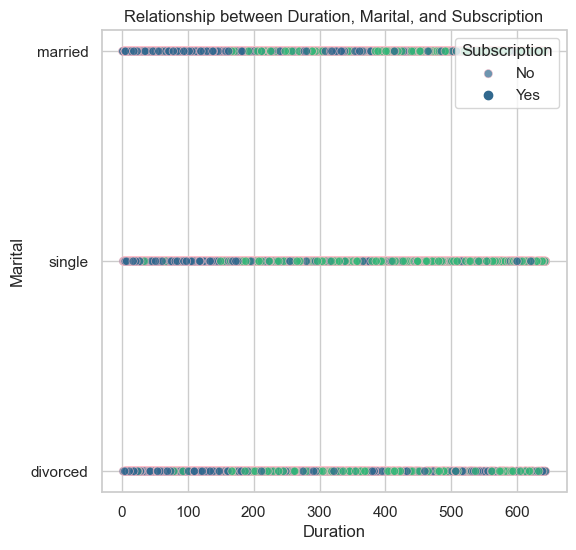

In [64]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a scatter plot
plt.figure(figsize=(6, 6))
sns.scatterplot(x='duration', y='marital', hue='y', data=data_df_no_outliers, palette='viridis', alpha=0.7, edgecolor='pink', linewidth=0.5)

# Set plot labels and title
plt.xlabel('Duration')
plt.ylabel('Marital')
plt.title('Relationship between Duration, Marital, and Subscription')

# Show legend
plt.legend(title='Subscription', loc='upper right', labels=['No', 'Yes'])

# Show the plot
plt.savefig('Relationship_between_Duration_Marital_and_Subscription.png')
plt.show()


**Insight**
- It seems that the divorced and married groups tend to have longer call durations when subscribing, and the single group also shows a significant increase in call durations.

## --------------------------- Feature Engineering ----------------------

### Encode categorical features

#### Poutcome

In [30]:
# Replace 'unknown' with 'other' in the 'poutcome' column
data_df_no_outliers['poutcome'] = data_df_no_outliers['poutcome'].replace('unknown', 'other')

In [31]:
data_df_no_outliers.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,pdays_bin
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0,other,0,No
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0,other,0,No
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0,other,0,No
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0,other,0,No
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0,other,0,No


In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_cleaned = data_df_no_outliers.copy()

data_cleaned['job'] = label_encoder.fit_transform(data_cleaned['job'])
data_cleaned['marital'] = label_encoder.fit_transform(data_cleaned['marital'])
data_cleaned['education'] = label_encoder.fit_transform(data_cleaned['education'])
data_cleaned['default'] = label_encoder.fit_transform(data_cleaned['default'])
data_cleaned['housing'] = label_encoder.fit_transform(data_cleaned['housing'])
data_cleaned['loan'] = label_encoder.fit_transform(data_cleaned['loan'])
data_cleaned['contact'] = label_encoder.fit_transform(data_cleaned['contact'])
data_cleaned['month'] = label_encoder.fit_transform(data_cleaned['month'])
data_cleaned['poutcome'] = label_encoder.fit_transform(data_cleaned['poutcome'])
data_cleaned['pdays_bin'] = label_encoder.fit_transform(data_cleaned['pdays_bin'])

In [33]:
data_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,y,pdays_bin
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,0,1,0,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,0,1,0,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,0,1,0,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,0,1,0,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,0,1,0,0


### Processing numeric features - Standardization numeric features

In [34]:
numeric_columns = ['age', 'balance', 'duration', 'campaign', 'previous']

In [35]:
# Log transformation for 'duration'
data_cleaned['duration'] = data_cleaned['duration'].apply(lambda x: np.log1p(x) if x > 0 else 0)

In [36]:
from sklearn.preprocessing import StandardScaler

# Create a copy of the DataFrame with numeric columns
numeric_data = data_cleaned[numeric_columns].copy()

# Use StandardScaler to normalize data
scaler = StandardScaler()
numeric_data_scaled = scaler.fit_transform(numeric_data)

# Create a new DataFrame with normalized data
numeric_data_scaled_df = pd.DataFrame(numeric_data_scaled, columns=numeric_columns)

In [47]:
# Reset the index for both DataFrames
data_df_reset = data_cleaned[['job', 'marital', 'education', 'default', 'housing',
                              'loan', 'contact', 'day', 'month', 'poutcome', 'pdays_bin', 'y']].reset_index(drop=True)
numeric_data_scaled_reset = numeric_data_scaled_df.reset_index(drop=True)

# Include normalized data into the original DataFrame
data_df_combined = pd.concat([data_df_reset, numeric_data_scaled_reset], axis=1)

# Displays the first few rows of the new DataFrame
data_df_combined.head()

,job,marital,education,default,housing,loan,contact,day,month,poutcome,pdays_bin,y,age,balance,duration,campaign,previous
0,4,1,2,0,1,0,2,5,8,1,0,0,1.785852,1.797989,0.620664,-0.857706,-0.245567
1,9,2,1,0,1,0,2,5,8,1,0,0,0.375212,-0.720572,-0.077355,-0.857706,-0.245567
2,2,1,1,0,1,1,2,5,8,1,0,0,-0.733147,-0.752740,-0.949231,-0.857706,-0.245567
3,1,1,3,0,1,0,2,5,8,1,0,0,0.677492,1.039085,-0.707192,-0.857706,-0.245567
4,11,2,3,0,0,0,2,5,8,1,0,0,-0.733147,-0.753931,0.268055,-0.857706,-0.245567


## Feature Selection

In [48]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Separate features and target variable
X = data_df_combined.drop('y', axis=1)
y = data_df_combined['y']

# Initialize Random Forest model
rf_model = RandomForestClassifier()

# Fit the model to the data
rf_model.fit(X, y)

# Get feature importances
feature_importances = rf_model.feature_importances_


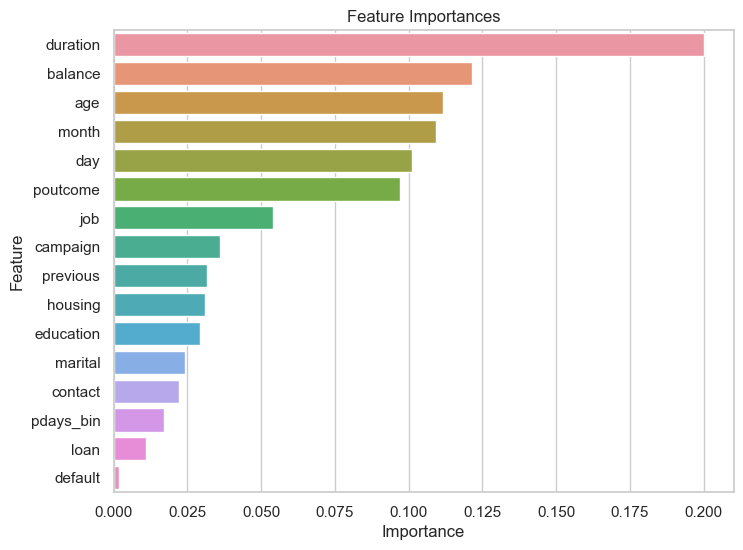

In [49]:
# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.savefig("Featue_importances.png")
plt.show()

In [50]:
data_df_combined = data_df_combined.drop(['loan', 'default'], axis=1)

### Imbalance processing

In [51]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = data_df_combined.drop('y', axis=1)
y = data_df_combined['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and transform the training data
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

In [52]:
# Check the number of samples after oversampling in the training set
print("Number of samples in the minority class after oversampling:", sum(y_train_resampled == 1))
print("Number of samples in the majority class after oversampling:", sum(y_train_resampled == 0))

Number of samples in the minority class after oversampling: 25452
Number of samples in the majority class after oversampling: 25452


##  ---------------------------  Model Selection -----------------------------

In [53]:
X_train_resampled = X_train_resampled.values
X_test = X_test.values

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import pandas as pd


# Define a list of classifiers
classifiers = {
    'Logistic_reg': LogisticRegression(),
    'RandomForest': RandomForestClassifier(),
    'Knn': KNeighborsClassifier(),
    'DesionTree': DecisionTreeClassifier()
}

# Initialize an empty list to store results
results = []

# Iterate through each classifier
for name, classifier in classifiers.items():
    print(f"Training {name}...")
    
    # Fit the model to the training data
    classifier.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the train set
    y_train_pred = classifier.predict(X_train_resampled)
    
    # Calculate accuracy and roc_auc_score on the train set
    accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
    roc_auc_train = roc_auc_score(y_train_resampled, y_train_pred)
    
    # Make predictions on the test set
    y_test_pred = classifier.predict(X_test)
    
    # Calculate accuracy and roc_auc_score on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    
    # Append results to the list
    results.append({
        'Model': name,
        'Accuracy_rate_train': accuracy_train,
        'Roc_auc_rate_train': roc_auc_train,
        'Accuracy_rate_test': accuracy_test,
        'Roc_auc_rate_test': roc_auc_test
    })

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

Training Logistic_reg...
Training RandomForest...
Training Knn...
Training DesionTree...


In [55]:
results_df

,Model,Accuracy_rate_train,Roc_auc_rate_train,Accuracy_rate_test,Roc_auc_rate_test
0,Logistic_reg,0.794122,0.794122,0.781826,0.788518
1,RandomForest,1.000000,1.000000,0.934908,0.705932
2,Knn,0.964580,0.964580,0.879032,0.757716
3,DesionTree,1.000000,1.000000,0.907258,0.686146


#### **Conclusion:**
- The Logistic Regression model shows relatively stable performance on both the training and test sets
- The Random Forest model seems to overfit the training data, as the test accuracy is significantly lower than the training accuracy. The substantial drop in ROC AUC on the test set is also a concerning sign.
- The KNN model performs well, but there is a slight decrease in accuracy on the test set compared to the training set. The ROC AUC also decreases, but it remains relatively stable.
- The Decision Tree model exhibits good performance on the training set, but there are signs of overfitting and a decrease in performance on the test set. The ROC AUC on the test set also drops significantly.
- **Logistic Regression** seems to be the most balanced model for this classification task

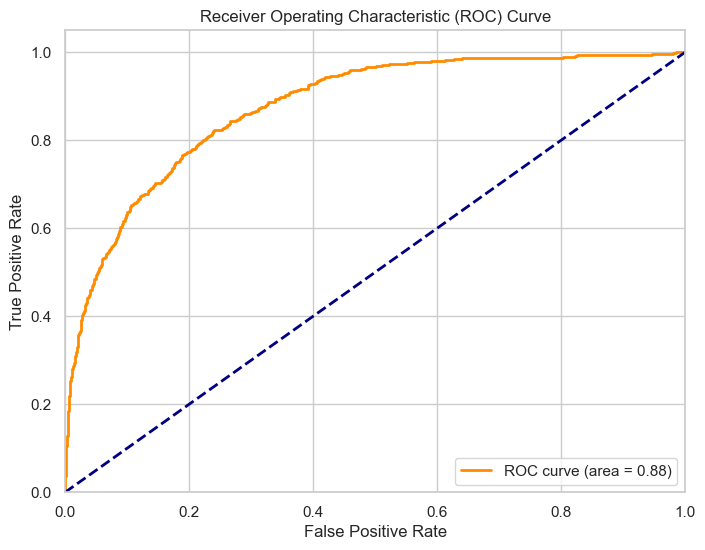

In [56]:
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Fit the Logistic Regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_proba = logistic_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## ----------------------------- Conclusion ----------------------
- **Optimize Contact Time:**
- Time-Specific Attention:
- Focus on the timing of contacts: Enhance the communication strategy during peak subscription periods, such as weekends or around the 20th day of each month.
- **Campaign Management:**
- Optimize the number of contact attempts within a campaign to maintain campaign effectiveness without causing inconvenience to customers.
- **Strengthen Mobile Communication:**
- Prioritize Mobile Communication:
- Intensify the use of mobile communication channels, particularly cellular, as they demonstrate higher subscription rates compared to other channels.
- **Customer Information Discovery:**
- Explore Customer Details:
- Gain additional insights into customers' occupations, marital status, and education to develop a personalized marketing strategy based on their individual characteristics.